In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Create A Simple Signal with Two Frequencies

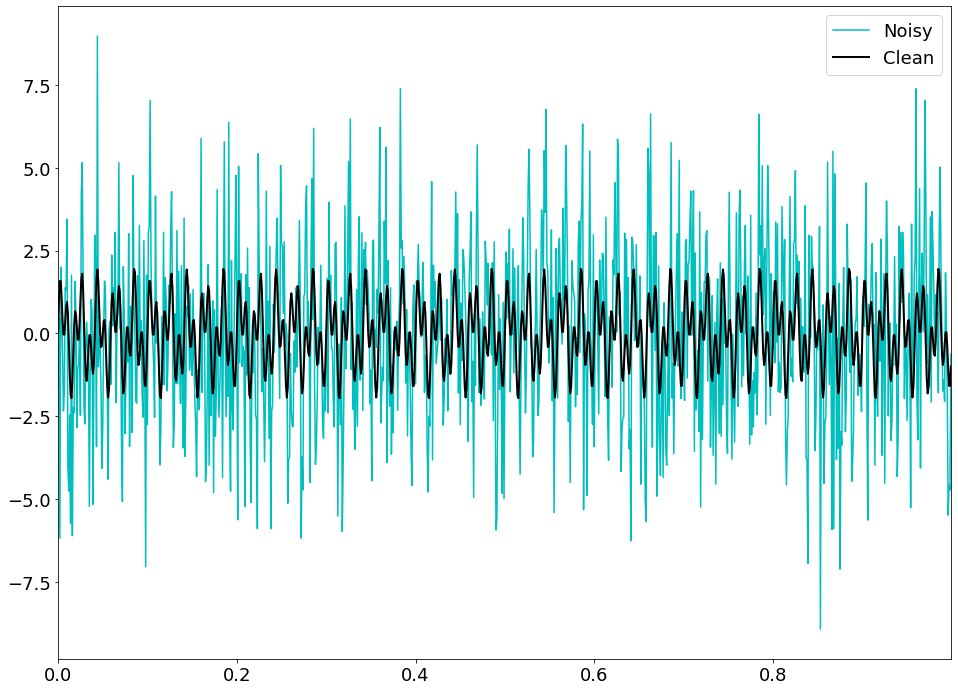

In [18]:
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t)) #add some noise

plt.plot(t,f,color='c',linewidth="1.5",label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()


# Compute the Fast Fourier Transform


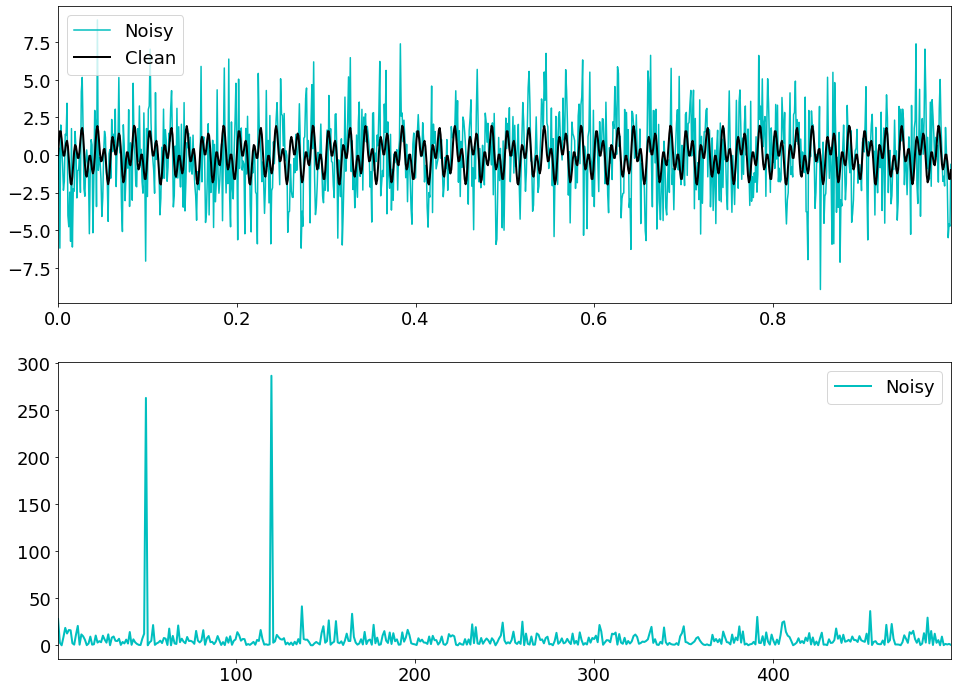

In [19]:
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat)/n #Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') #Only plot the first half of

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [20]:
indices = PSD > 100 #Find all freqs with large power
PSDclean = PSD * indices #Zero out all others 
fhat = indices * fhat #Zero out small Fourier coeffs in Y
ffilt = np.fft.ifft(fhat) #Inverse FFT for filtered time signal

<function matplotlib.pyplot.show(close=None, block=None)>

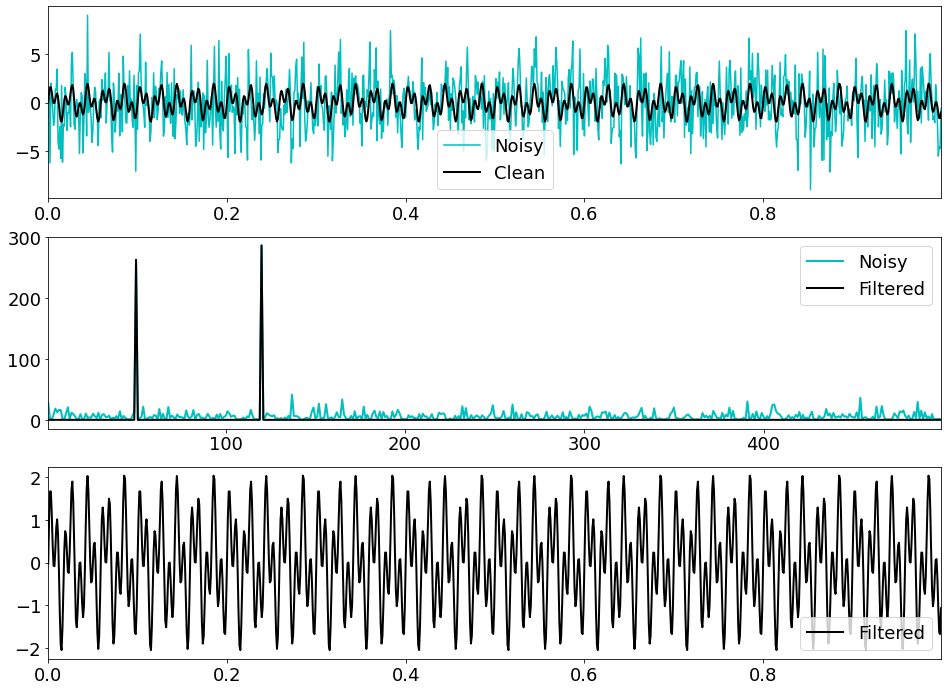

In [24]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',linewidth=2,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(axs[2])
plt.plot(t,ffilt,color='k',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show